Decide which metrics(attributes) to use to assess the best team performance in the regular season. These don’t have to be backed by hard-evidence, but try to use some simple graphs to show the relation between a metric and a team's win percentage. For instance, the  Pearson R metric should be able to accomplish this. 

Resource: https://www.teamrankings.com/nba/stats/ 

#### What does Pearson R Mean? 

- 1 indicates a perfect positive linear relationship.
- -1 indicates a perfect negative linear relationship.
- 0 indicates no linear relationship.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import os
import numpy as np
import matplotlib.pyplot as plt

Metric #1: Effective Field Goal Percentage (eFG%)

In [17]:
# Comparing efG to win%, from 2016 - 2024

# use .. to go back a directory
efg_dir = '../TeamMetrics/efg_pct'
win_pct_dir = '../TeamMetrics/win_pct'

teams = [f.split('.')[0] for f in os.listdir(efg_dir) if f.endswith('.csv')]

efg_data = pd.DataFrame()

#Combine efg and win percentage data
for team in teams:
    efg_file = os.path.join(efg_dir, f'{team}.csv')
    win_pct_file = os.path.join(win_pct_dir, f'{team}.csv')

    efg_team = pd.read_csv(efg_file)
    win_pct_team = pd.read_csv(win_pct_file)

    # Verify statistic and year exist
    efg_team = efg_team[['Year', 'Statistic']].rename(columns={'Statistic': 'efg'})
    win_pct_team = win_pct_team[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes efg and win_pct on 'Year'
    # inner join for rows with common values in 'Year'
    combined = pd.merge(efg_team, win_pct_team, on='Year', how='inner')
    combined['Team'] = team  # Add team identifier

    # combined data
    efg_data = pd.concat([efg_data, combined], ignore_index=True)
    
print(efg_data.head(5)) # verify the data is correct.


# Pearson correlation coefficient
correlation = efg_data['efg'].corr(efg_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year    efg  win_pct     Team
0  2018  0.512    0.293  Atlanta
1  2007  0.471    0.366  Atlanta
2  2012  0.495    0.583  Atlanta
3  2023  0.540    0.494  Atlanta
4  2022  0.542    0.517  Atlanta
Pearson Correlation Coefficient: 0.44947


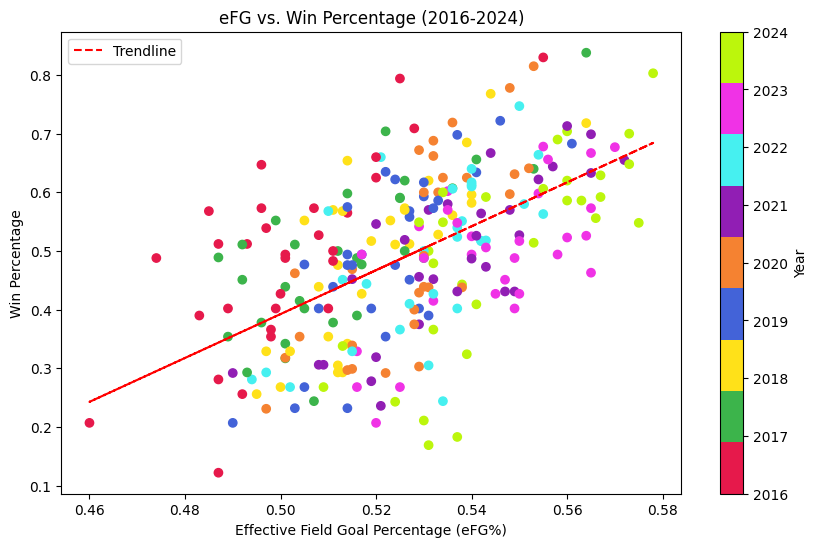

In [18]:


# Filter data for years 2016-2024 (three point revolution)
efg_data = efg_data[efg_data['Year'].between(2016, 2024)]

# Create a list of colors for each yeear
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(efg_data['Year'].unique())])

# Colormap index-matching for years
year_mapping = {year: idx for idx, year in enumerate(sorted(efg_data['Year'].unique()))}
efg_data['year_color'] = efg_data['Year'].map(year_mapping)

# set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    efg_data['efg'], 
    efg_data['win_pct'], 
    c=efg_data['year_color'], 
    cmap=cmap, 
    alpha=1.0 # transparency
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(year_mapping)))
cbar.set_label('Year')
cbar.set_ticks(list(year_mapping.values()))
cbar.set_ticklabels(list(year_mapping.keys()))

# Calculate and plot the trendline
z = np.polyfit(efg_data['efg'], efg_data['win_pct'], 1)
p = np.poly1d(z)
plt.plot(efg_data['efg'], p(efg_data['efg']), color='red', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Effective Field Goal Percentage (eFG%)')
plt.ylabel('Win Percentage')
plt.title('eFG vs. Win Percentage (2016-2024)')
plt.grid(False) # enable this to beter see the trendline
plt.legend()
plt.show()